In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#import of the dataset, and creation of a copy to work on it
data = pd.read_excel('data/dataset.xlsx')
df = data.copy()

#### The Goal is to modelize possible relations between our target value 'SARS-Cov-2 exam result' (if a person was tested positive/negative to Covid) and the other values that we have in the dataset.

# Broad Analysis of the Dataset

In [3]:
#what is the size of the dataset
df.shape

(5644, 111)

In [4]:
#quick overview of the dataset
pd.set_option('display.max_column',111)
df.head()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Serum Glucose,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Mycoplasma pneumoniae,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,Neutrophils,Urea,Proteina C reativa mg/dL,Creatinine,Potassium,Sodium,"Influenza B, rapid test","Influenza A, rapid test",Alanine transaminase,Aspartate transaminase,Gamma-glutamyltransferase,Total Bilirubin,Direct Bilirubin,Indirect Bilirubin,Alkaline phosphatase,Ionized calcium,Strepto A,Magnesium,pCO2 (venous blood gas analysis),Hb saturation (venous blood gas analysis),Base excess (venous blood gas analysis),pO2 (venous blood gas analysis),Fio2 (venous blood gas analysis),Total CO2 (venous blood gas analysis),pH (venous blood gas analysis),HCO3 (venous blood gas analysis),Rods #,Segmented,Promyelocytes,Metamyelocytes,Myelocytes,Myeloblasts,Urine - Esterase,Urine - Aspect,Urine - pH,Urine - Hemoglobin,Urine - Bile pigments,Urine - Ketone Bodies,Urine - Nitrite,Urine - Density,Urine - Urobilinogen,Urine - Protein,Urine - Sugar,Urine - Leukocytes,Urine - Crystals,Urine - Red blood cells,Urine - Hyaline cylinders,Urine - Granular cylinders,Urine - Yeasts,Urine - Color,Partial thromboplastin time (PTT),Relationship (Patient/Normal),International normalized ratio (INR),Lactic Dehydrogenase,"Prothrombin time (PT), Activity",Vitamin B12,Creatine phosphokinase (CPK),Ferritin,Arterial Lactic Acid,Lipase dosage,D-Dimer,Albumin,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,0.102004,0.318366,-0.95079,-0.09461,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,-0.140648,not_detected,not_detected,not_detected,not_detected,not_detected,detected,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,-0.619086,1.198059,-0.147895,2.089928,-0.305787,0.862512,negative,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [5]:
#what are the types of values we have in each column 
df.dtypes.value_counts()

float64    70
object     37
int64       4
dtype: int64

<Axes: >

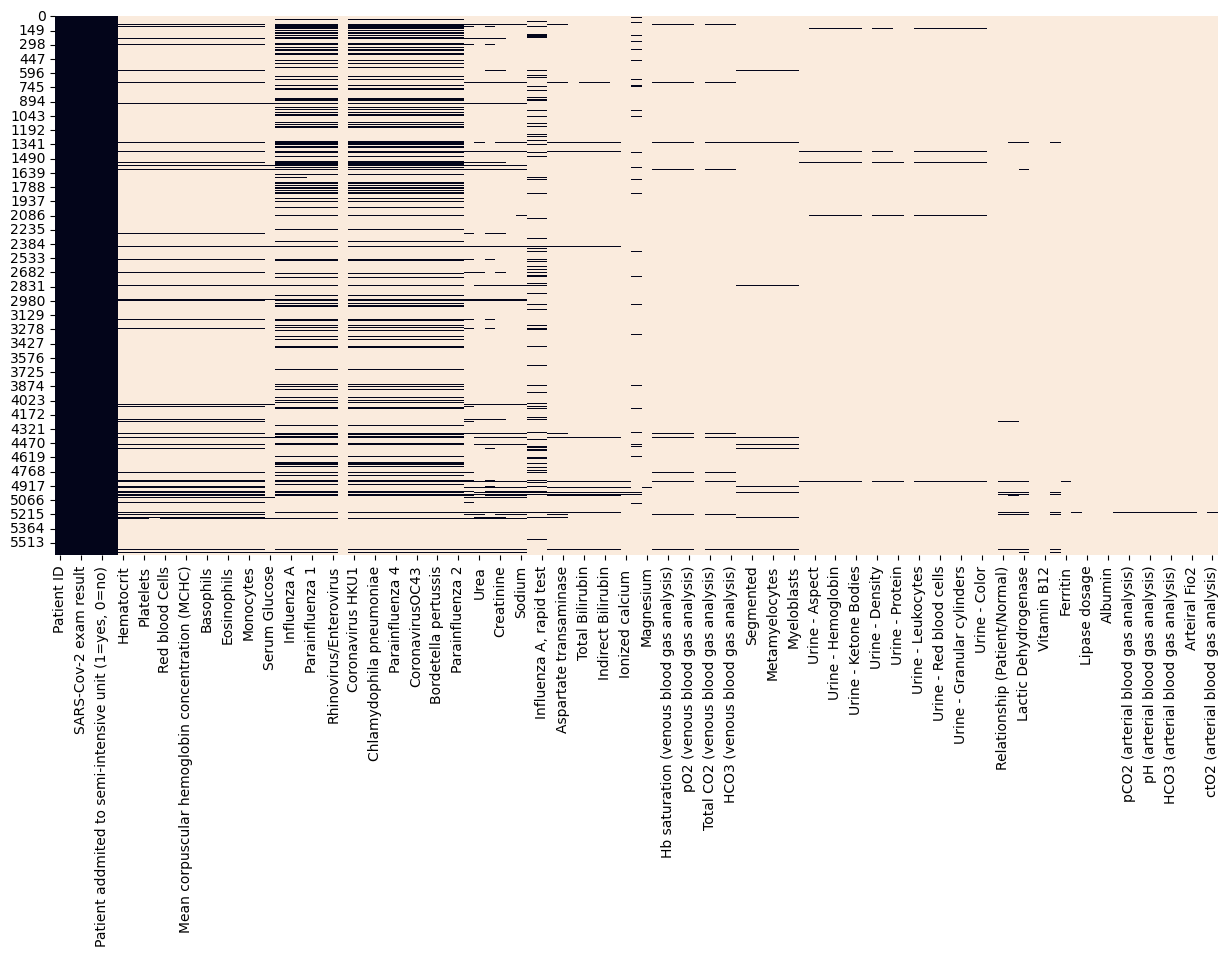

In [6]:
#use of a heatmap to have an overview of the missing data
plt.figure(figsize=(15,7))
sns.heatmap(df.isna(),cbar=False)

#we can already see that a lots of values won't be useful, due to the lack of data 
#we can also see that some data categories seem to exist. On the left the data that are related to blood analysis.
# And just to the right, a series of viral disease.

In [7]:
#let's calculate the percentage of missing data for each value
(df.isna().sum()/df.shape[0]).sort_values(ascending = True)


Patient ID                                               0.0
Patient age quantile                                     0.0
SARS-Cov-2 exam result                                   0.0
Patient addmited to regular ward (1=yes, 0=no)           0.0
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.0
                                                        ... 
Partial thromboplastin time (PTT)                        1.0
Urine - Sugar                                            1.0
Mycoplasma pneumoniae                                    1.0
D-Dimer                                                  1.0
Prothrombin time (PT), Activity                          1.0
Length: 111, dtype: float64

In [8]:
#creation of a new dataframe that only keeps the values that have under 90% of missing data
#removal of the Patient ID column, because it's not relevant to determine if a person is positive or negative to Covid

df = df[df.columns[df.isna().sum()/df.shape[0] < 0.9]].drop('Patient ID', axis = 1)
df.shape

(5644, 38)

In [9]:
#new dataframe with now only 38 values to work with
df.head()

,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,"Influenza B, rapid test","Influenza A, rapid test"
0,13,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,0.102004,0.318366,-0.95079,-0.09461,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,not_detected,not_detected,not_detected,not_detected,not_detected,detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,negative,negative
2,8,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,15,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,NaN,NaN


<Axes: >

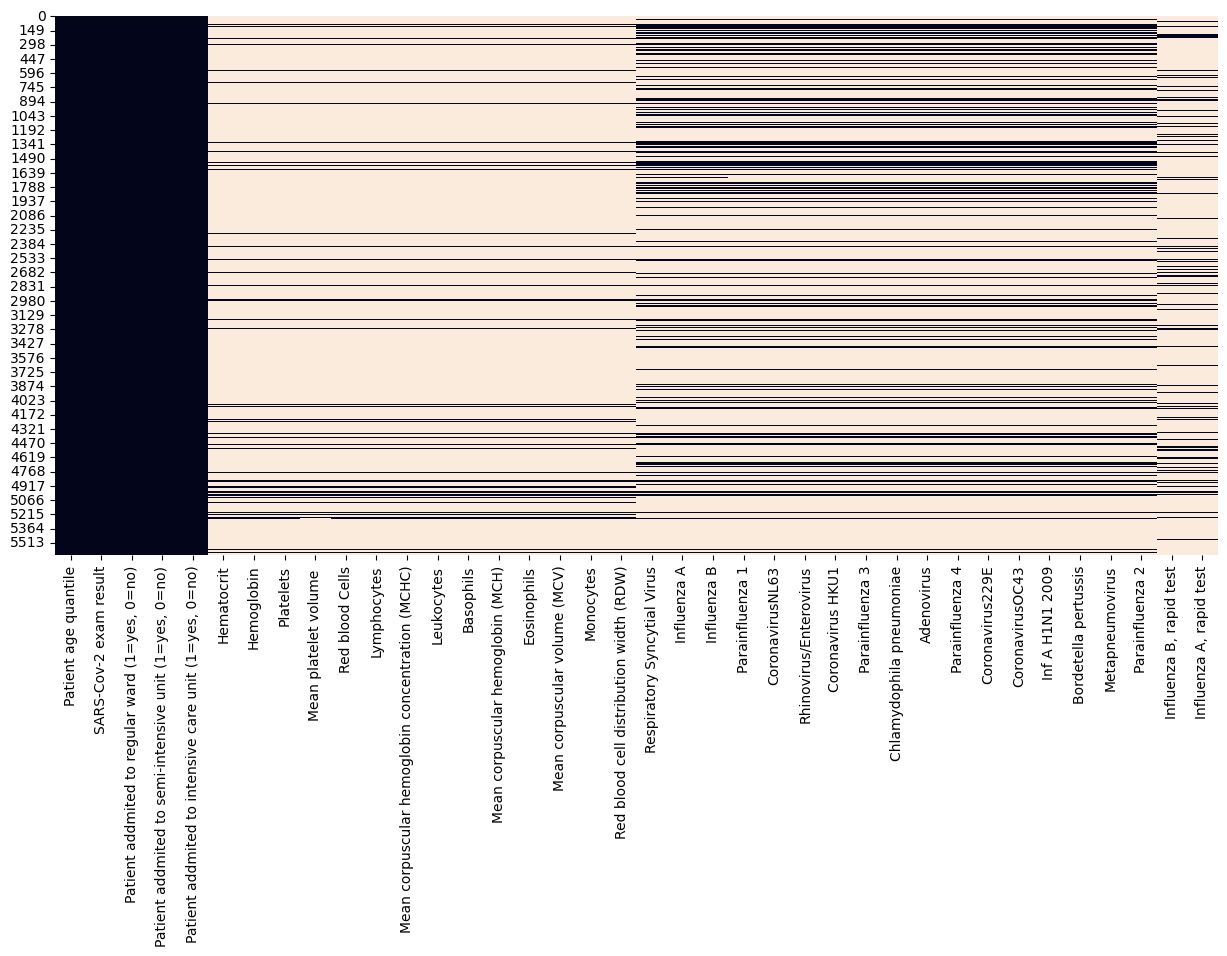

In [10]:
#new overview of our missing data with a heatmap
plt.figure(figsize=(15,7))
sns.heatmap(df.isna(),cbar=False)

In [11]:
#how much of the patients were tested positive/negative to Covid
df['SARS-Cov-2 exam result'].value_counts(normalize = True)

negative    0.901134
positive    0.098866
Name: SARS-Cov-2 exam result, dtype: float64

In [12]:
#A lot more of 'tested negative' patient are represented in the dataset, we have to take that into account

/var/folders/f7/1t0gd_nj48d85_3rv7fqxdbh0000gn/T/ipykernel_74362/2132851012.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


<Figure size 640x480 with 0 Axes>

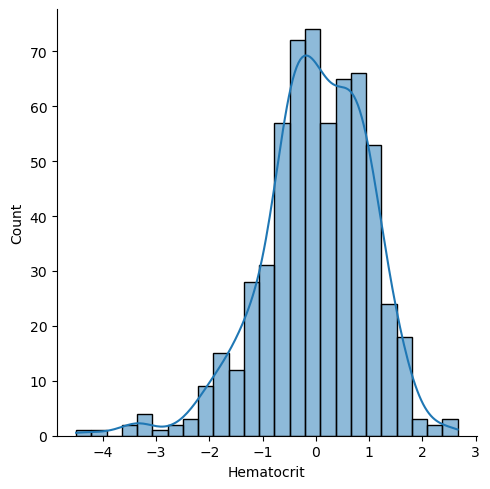

<Figure size 640x480 with 0 Axes>

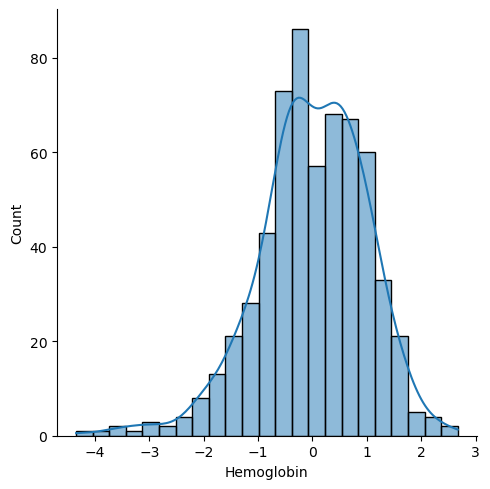

<Figure size 640x480 with 0 Axes>

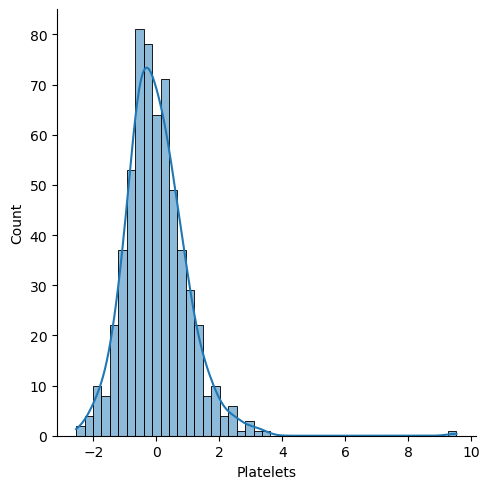

<Figure size 640x480 with 0 Axes>

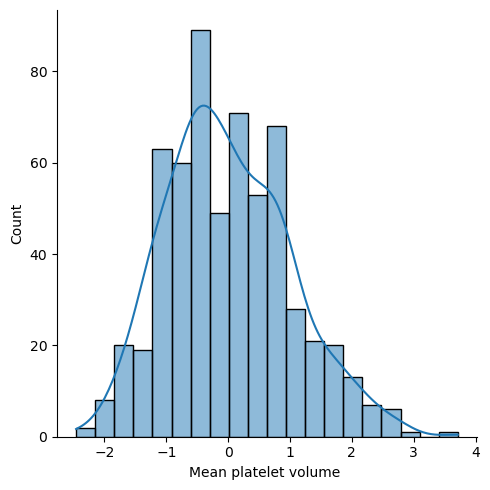

<Figure size 640x480 with 0 Axes>

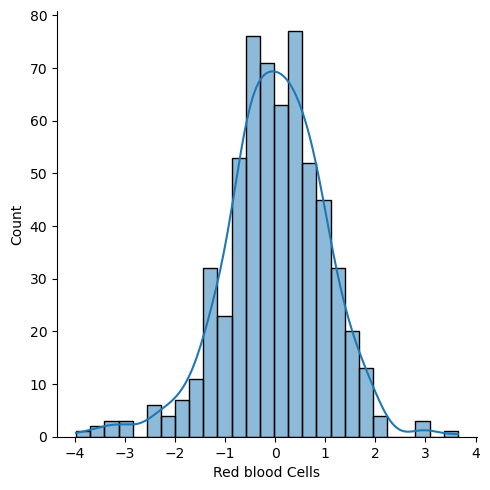

<Figure size 640x480 with 0 Axes>

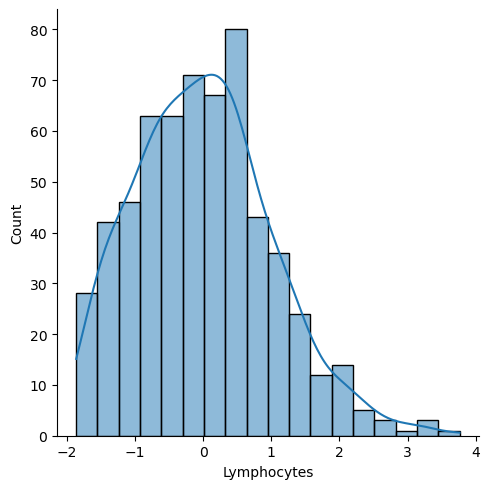

<Figure size 640x480 with 0 Axes>

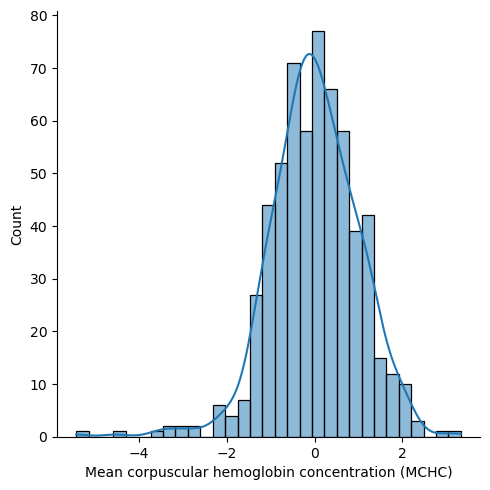

<Figure size 640x480 with 0 Axes>

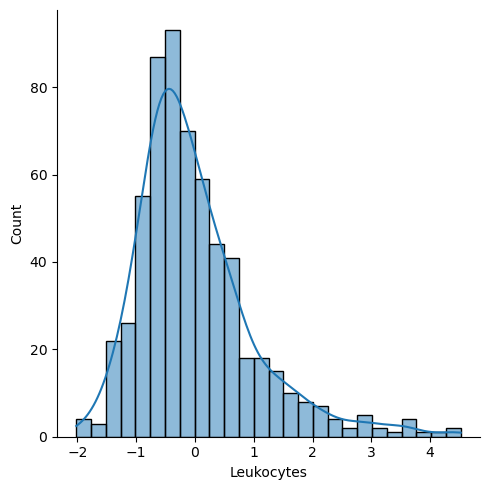

<Figure size 640x480 with 0 Axes>

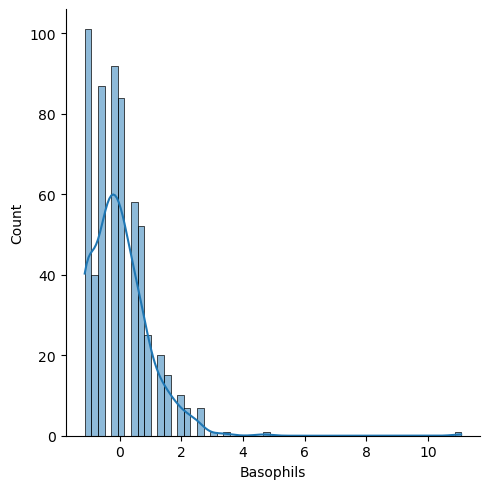

<Figure size 640x480 with 0 Axes>

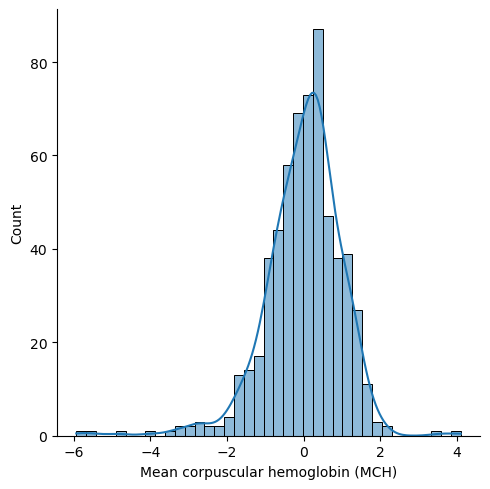

<Figure size 640x480 with 0 Axes>

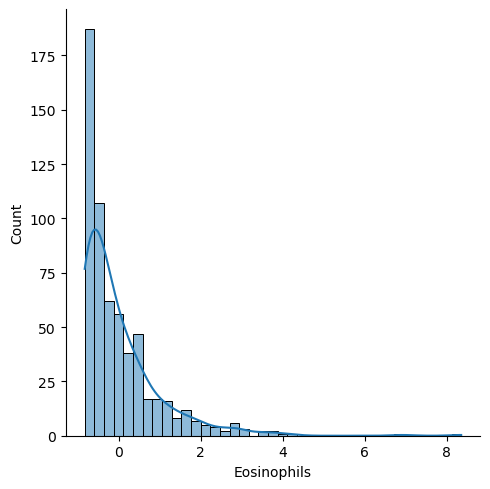

<Figure size 640x480 with 0 Axes>

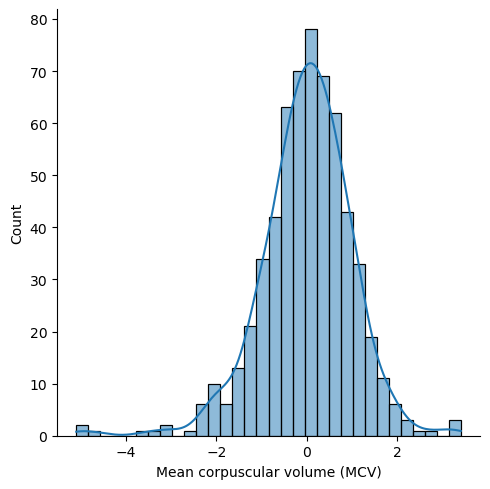

<Figure size 640x480 with 0 Axes>

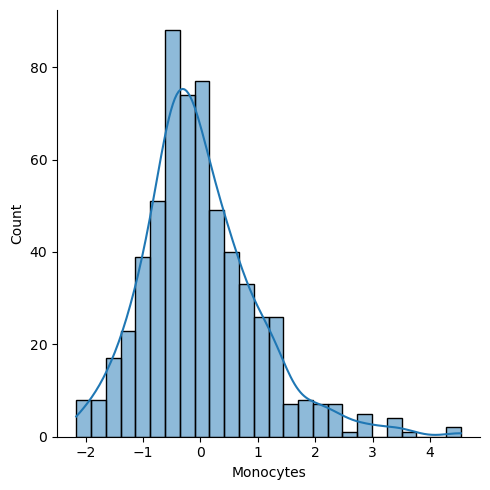

<Figure size 640x480 with 0 Axes>

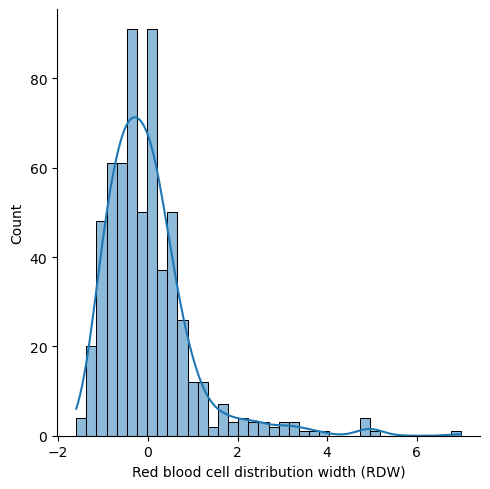

In [13]:
#for each column that contains only decimal values, how is the data distribution
for col in df.select_dtypes(float):
    plt.figure()
    sns.displot(df[col], kde=True)

Most values have a normal distribution, with some exceptions like Basophils and Eosinophils that we can enventually keep in mind for later.

<Axes: xlabel='Patient age quantile', ylabel='count'>

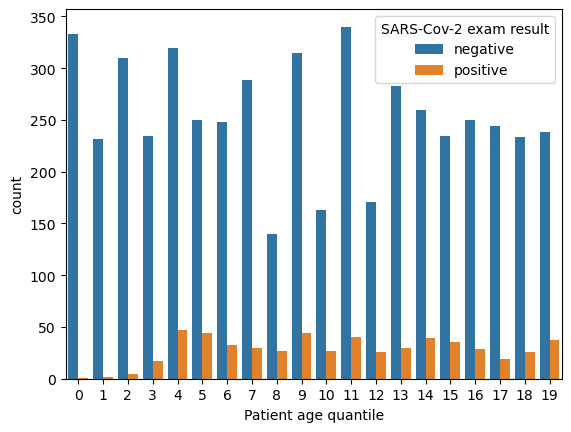

In [14]:
#is there a relation between a patient being tested positive or negative to Covid, and the age of the patient ?
sns.countplot(x='Patient age quantile', hue='SARS-Cov-2 exam result', data=df)

Looking at the above results, we could assume that the younger you are, the less chances you have of being tested positive.
But there is a huge problem with our 'age' values.
Indeed we don't know exactly what they represent. 
It seems that each number is an age category, but considering the fact that no notes have been provided with the dataset about this, I have decided for now to not take the age into account.

In [15]:
#what data can we find in our object type values
for col in df.select_dtypes(object):
    print(f'{col:_<40}{df[col].unique()}')

df.dtypes.value_counts()

SARS-Cov-2 exam result__________________['negative' 'positive']
Respiratory Syncytial Virus_____________[nan 'not_detected' 'detected']
Influenza A_____________________________[nan 'not_detected' 'detected']
Influenza B_____________________________[nan 'not_detected' 'detected']
Parainfluenza 1_________________________[nan 'not_detected' 'detected']
CoronavirusNL63_________________________[nan 'not_detected' 'detected']
Rhinovirus/Enterovirus__________________[nan 'detected' 'not_detected']
Coronavirus HKU1________________________[nan 'not_detected' 'detected']
Parainfluenza 3_________________________[nan 'not_detected' 'detected']
Chlamydophila pneumoniae________________[nan 'not_detected' 'detected']
Adenovirus______________________________[nan 'not_detected' 'detected']
Parainfluenza 4_________________________[nan 'not_detected' 'detected']
Coronavirus229E_________________________[nan 'not_detected' 'detected']
CoronavirusOC43_________________________[nan 'not_detected' 'detected']


object     20
float64    14
int64       4
dtype: int64

All object type values have a binary choice.

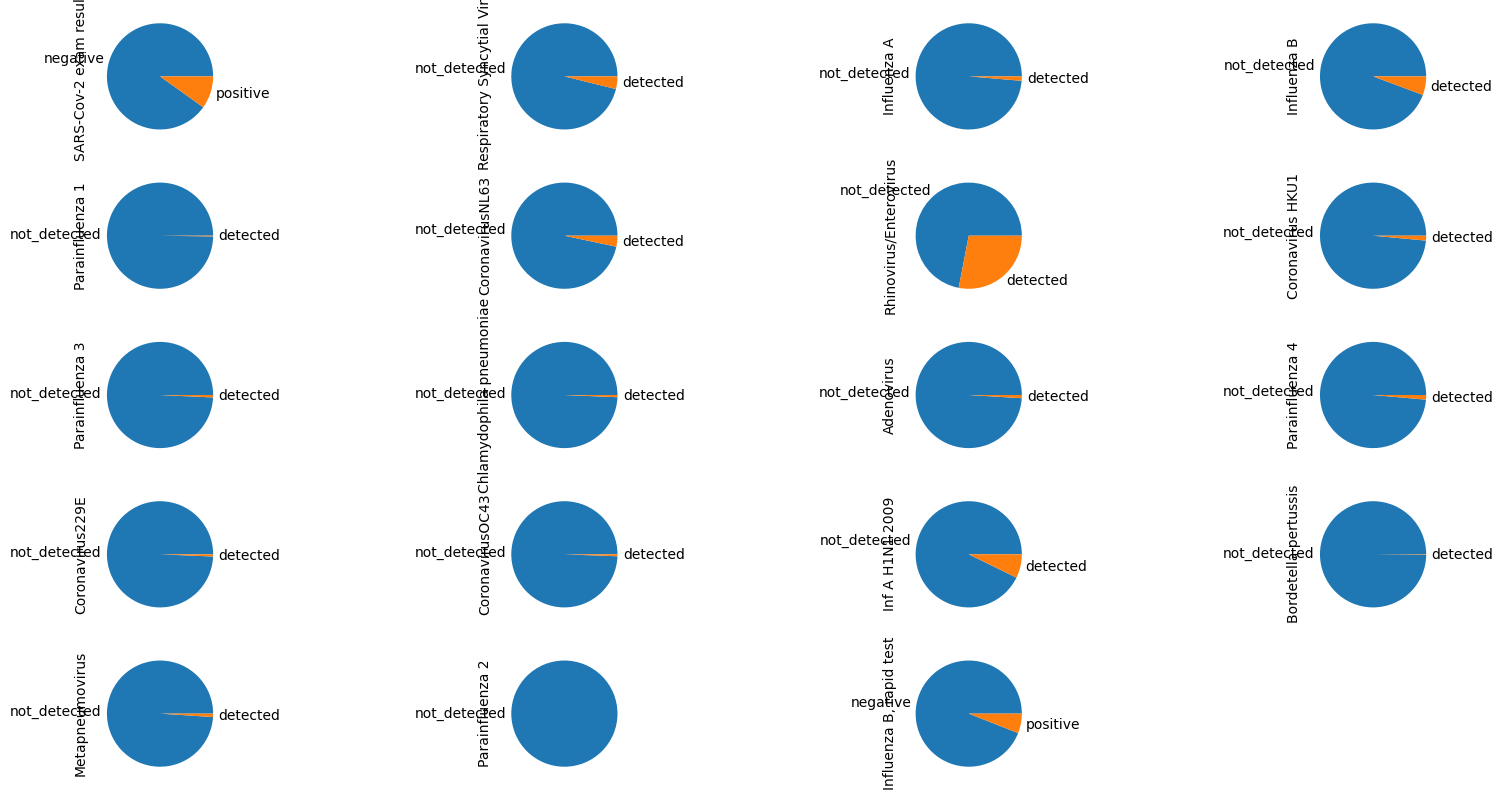

In [16]:
#for all object type columns, how many patient were tested positive to Covid 
plt.figure(figsize=(20,10))
for col, i in zip(df.select_dtypes(object), range(1,20)):
    plt.subplot(5,4,i)
    df[col].value_counts().plot.pie()

We can see that contracted the Rhinovirus also had Covid.
But it could just be a common epidemic of Rhinovirus that happened around the same time around the hospital where the data came from. 
So we can't jump into any conclusion here.

In [17]:
#creation of 2 new dataframes from the filtered of 38 variables we're currently using. 
#One with only the patients that were tested postive, One with the patients tested negative.
#Maybe we will be able to see some caracteristics for those categories.

positive_df = df[df['SARS-Cov-2 exam result'] == 'positive']
negative_df = df[df['SARS-Cov-2 exam result'] == 'negative']

In [18]:
#Previously we saw that a lots of values had approximately the same missing data rate.
#We calculate again the missing rate, and with it we can create 2 new dataframes. 
#One related to blood samples, one related to viral diseases.
missing_rate = df.isna().sum()/df.shape[0]
blood_columns = df.columns[(missing_rate < 0.9) & (missing_rate > 0.88) ]
viral_columns = df.columns[(missing_rate < 0.88) & (missing_rate > 0.75) ]

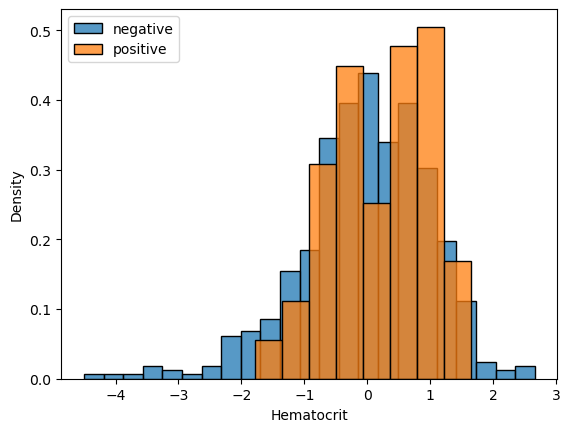

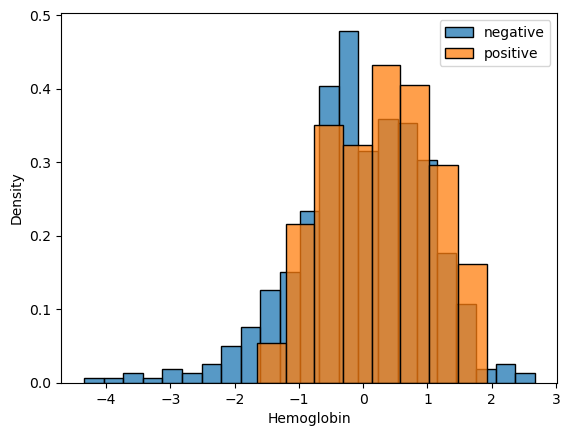

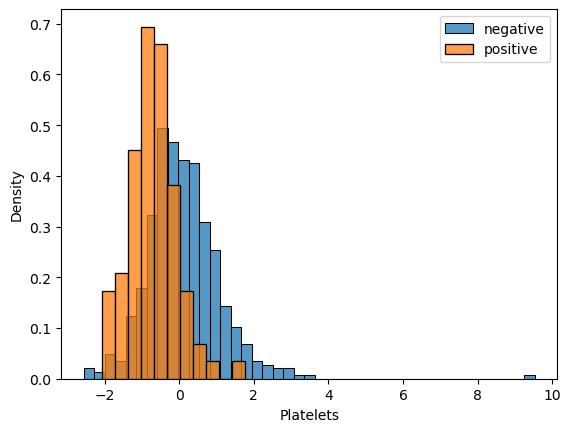

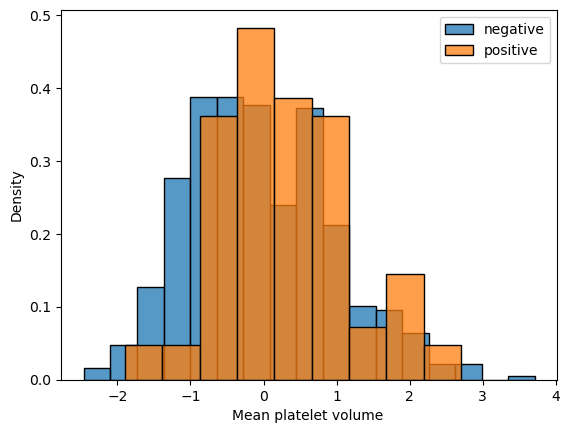

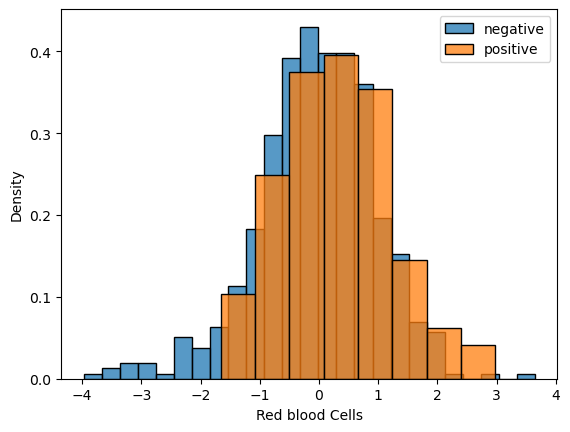

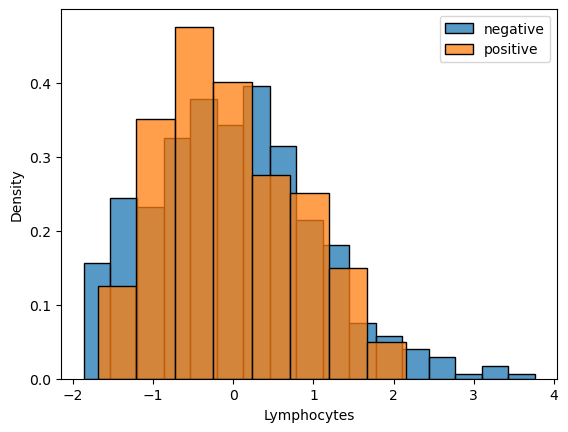

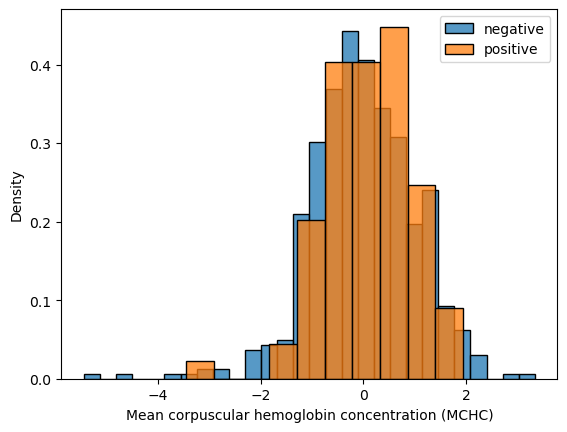

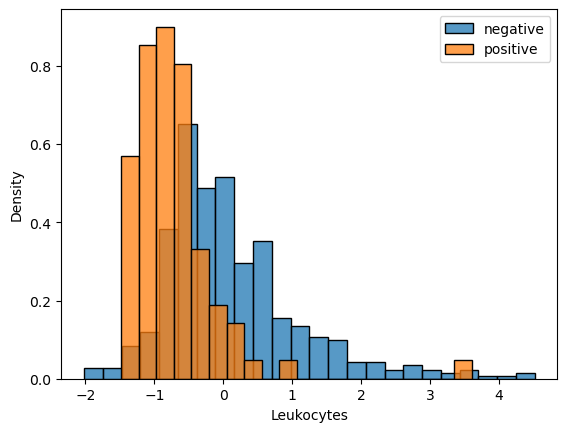

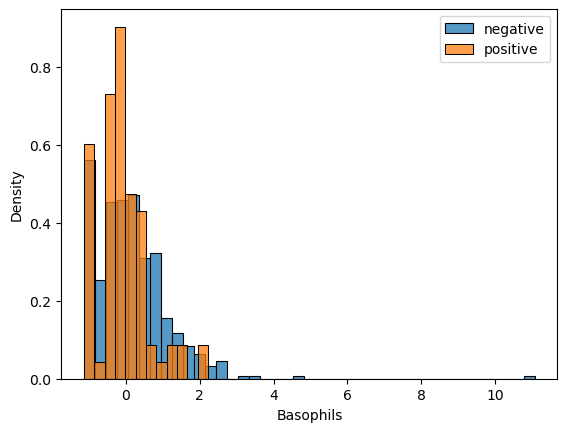

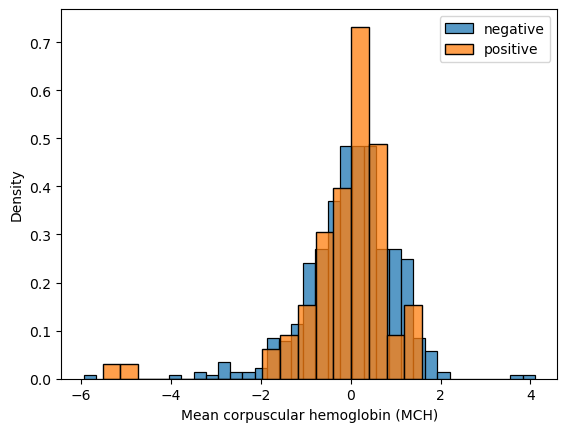

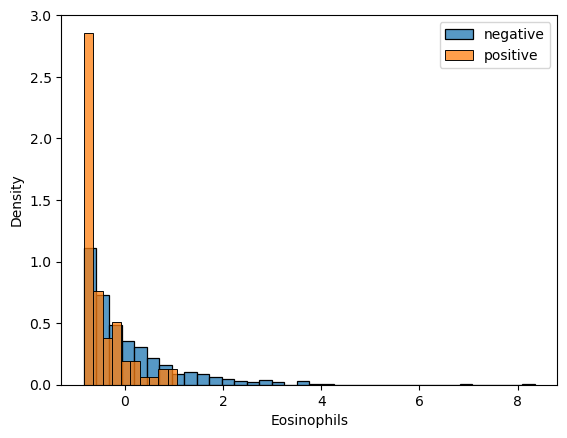

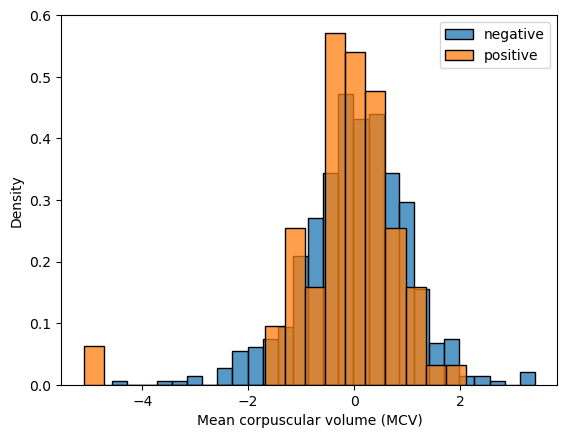

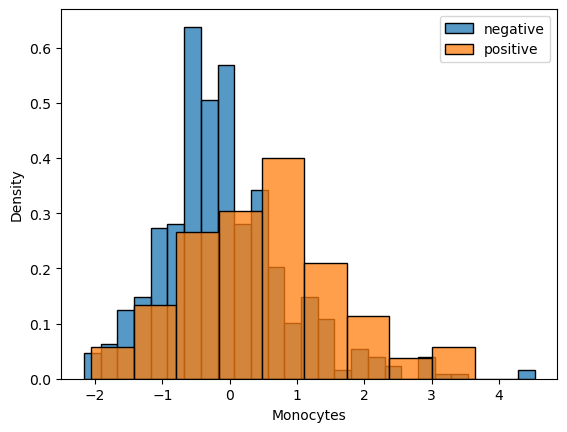

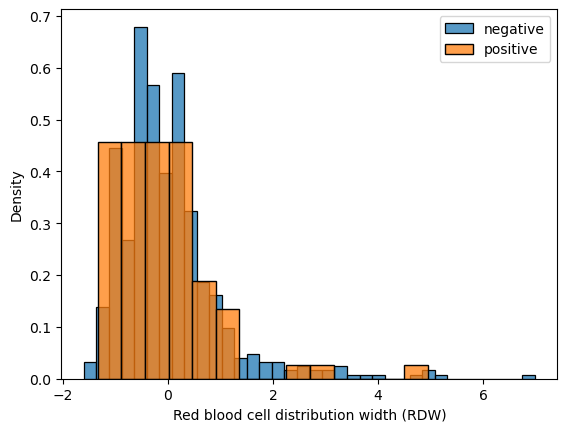

In [19]:
#Analysis of the density of positive/negative tested patient, that have the same blood samples values
for col in blood_columns:
    plt.figure()
    sns.histplot(negative_df[col], label = 'negative', stat = 'density')
    sns.histplot(positive_df[col], label = 'positive', stat = 'density')
    plt.legend()

The analysis of those graphics shows that patients have for most values the same results whether they were tested positive or negative.
However, it seems that we can find bigger density of positive tested patients for some values like Basophils and Eosinophils. 
We can find the same differences here that we found earlier when studying the distribution on the filtered dataset.
There might have something to dig out regarding a relation between some blood values and the SARS-Cov-2 exam result.

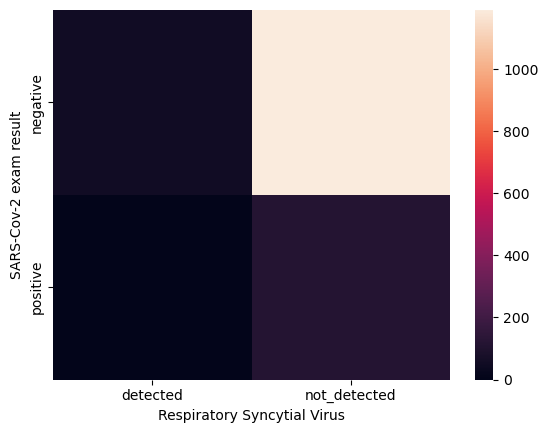

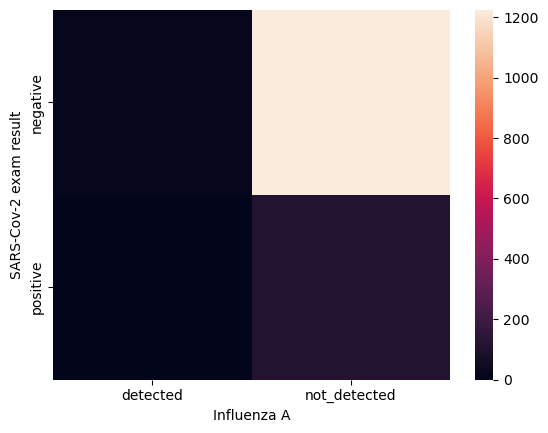

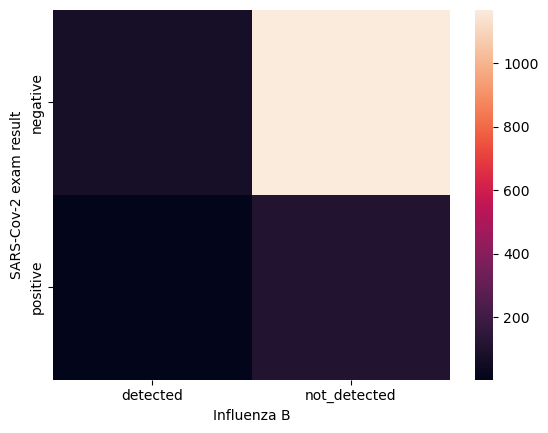

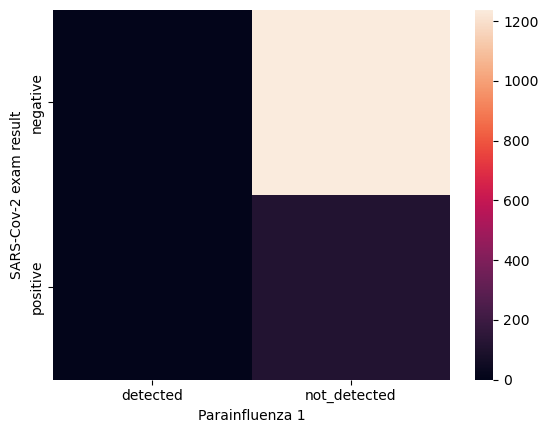

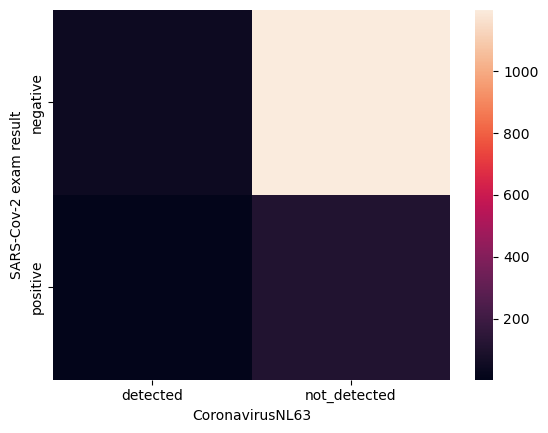

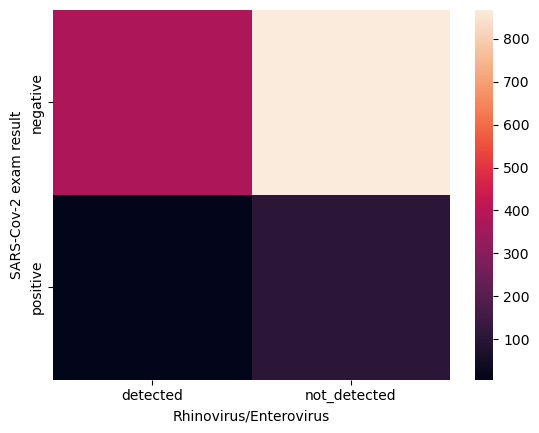

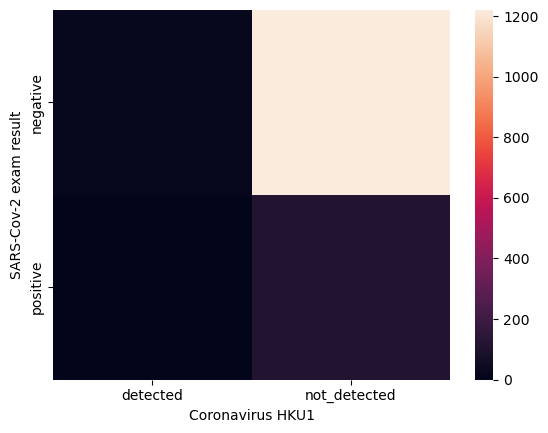

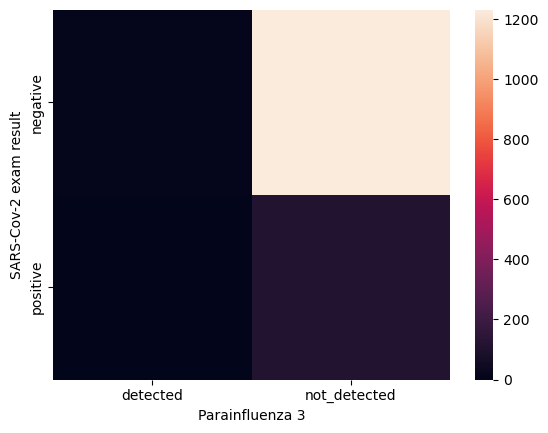

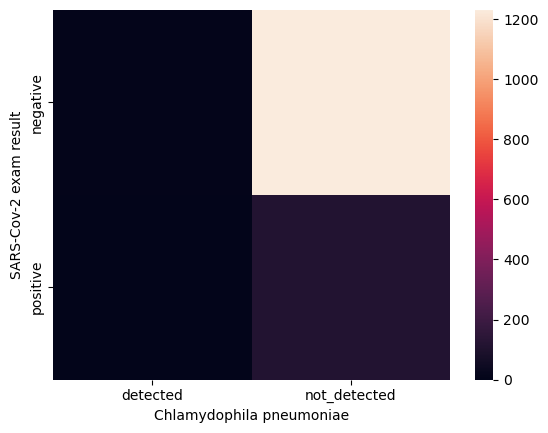

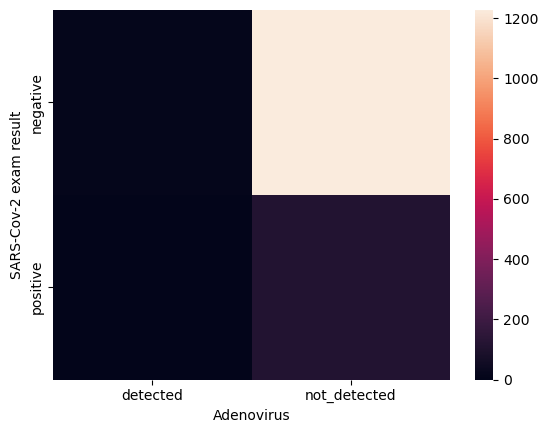

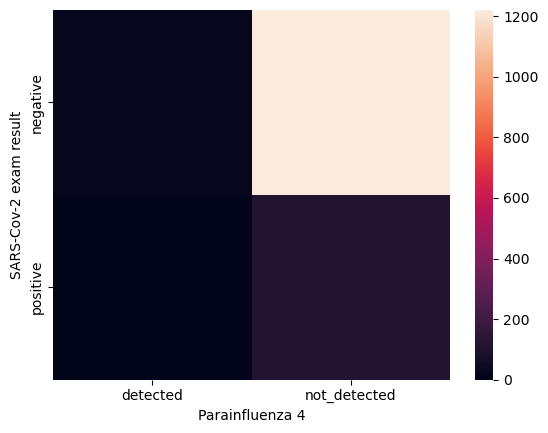

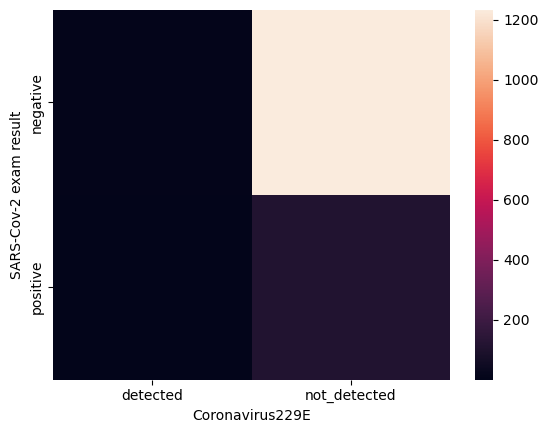

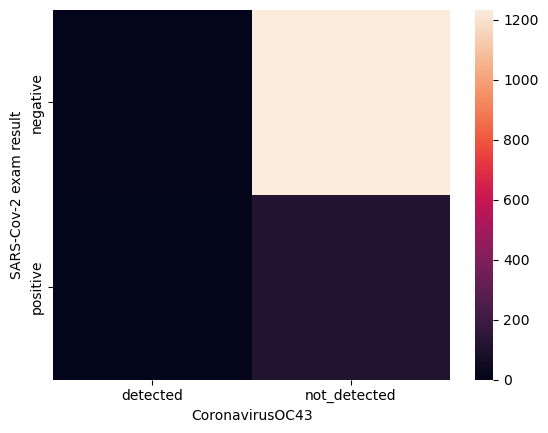

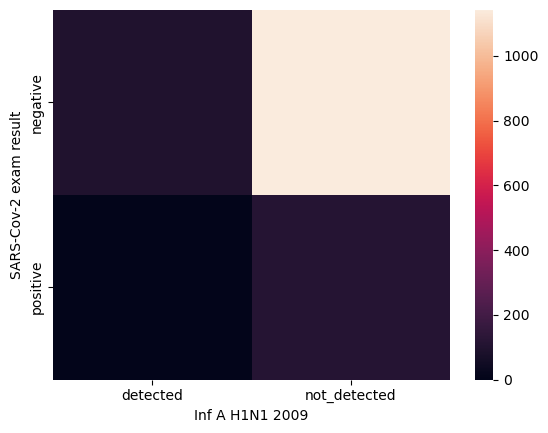

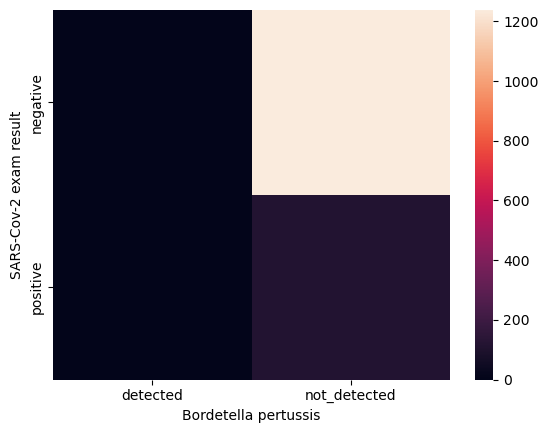

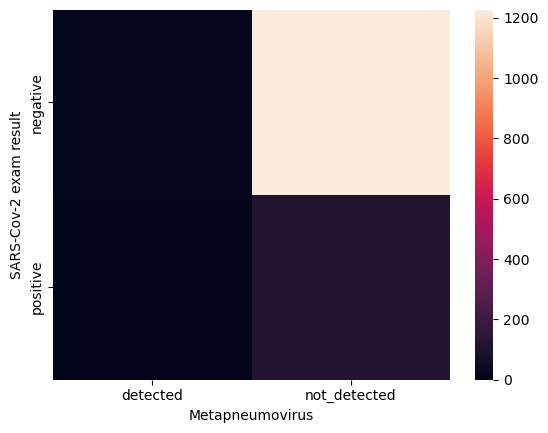

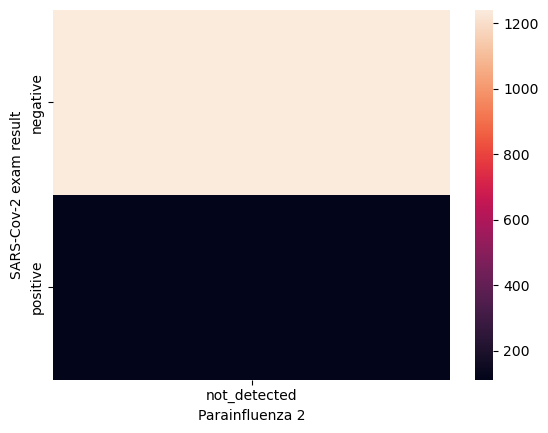

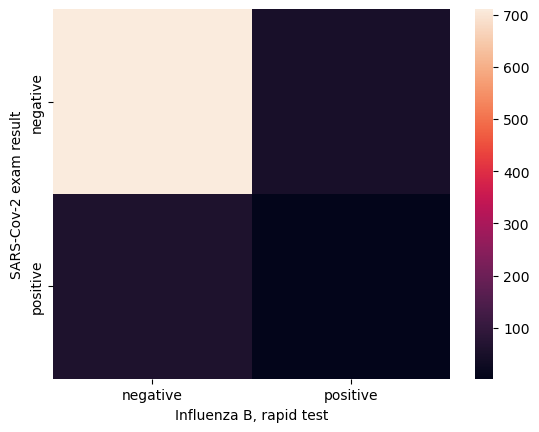

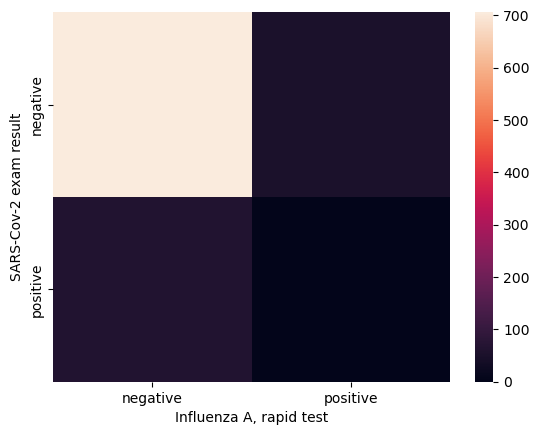

In [20]:
#we now try to find a possible link between being tested postive/negative to Viral diseases and being tested 
#positive/negative to Sars-Cov-2
for col in viral_columns:
    plt.figure()
    sns.heatmap(pd.crosstab(df['SARS-Cov-2 exam result'], df[col]))

One again the Rhinovirus stands out. But it just shows that a lot of patients at this hospital had contracted this virus without being tested positive to the Sars-Cov-2.
Even if it's not a final conclusion, it seems for now that we don't have a clear relation between those tested viral diseases and the Sars-Cov-2.